In [1]:
import gzip
from collections import defaultdict
import math
import scipy.optimize
from sklearn import svm
import numpy
import string
import random
from sklearn import linear_model
import scipy
import tensorflow as tf
import pandas as pd 
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from collections import defaultdict
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
def BER(predictions, y):
    TP = sum([(p and l) for (p,l) in zip(predictions, y)])
    FP = sum([(p and not l) for (p,l) in zip(predictions, y)])
    TN = sum([(not p and not l) for (p,l) in zip(predictions, y)])
    FN = sum([(not p and l) for (p,l) in zip(predictions, y)])
    TPR = TP / (TP + FN)
    TNR = TN / (TN + FP)
    BER = 1 - 1/2 * (TPR + TNR)
    return BER

In [4]:
data = pd.read_pickle("..\\data\\renttherunway_data_processed.pkl")
#data = pd.DataFrame(processed_data).to_dict('record')
data.dtypes

fit                       object
user_id                    int64
bust size                 object
item_id                    int64
weight                   float64
rating                   float64
rented for                object
review_text               object
body type                 object
review_summary            object
category                  object
height                   float64
size                       int64
age                      float64
review_date       datetime64[ns]
review_year                int64
review_month               int64
adjectives                 int64
review_length              int64
review_words               int64
review_ex                  int64
dtype: object

In [5]:
feature_list = []

In [6]:
#features to consider for the model 
bustsize = lambda x: int(x[0:2])
data["bust size"] = data["bust size"].apply(bustsize)

In [7]:
btype_data = data["body type"].value_counts()
btypes = list(btype_data.keys())
feature_list += (btypes)
for btype in btypes:
  bfun = lambda x: 1 if (x==btype) else 0
  data[btype] = data["body type"].apply(bfun)

In [8]:
rtype_data = data["rented for"].value_counts()
rtypes = list(rtype_data.keys())
feature_list += rtypes
for rtype in rtypes:
  rfun = lambda x: 1 if (x==rtype) else 0
  data[rtype] = data["body type"].apply(rfun)

In [9]:
feature_list.remove('party: cocktail')

In [10]:
data.dtypes

fit                          object
user_id                       int64
bust size                     int64
item_id                       int64
weight                      float64
rating                      float64
rented for                   object
review_text                  object
body type                    object
review_summary               object
category                     object
height                      float64
size                          int64
age                         float64
review_date          datetime64[ns]
review_year                   int64
review_month                  int64
adjectives                    int64
review_length                 int64
review_words                  int64
review_ex                     int64
hourglass                     int64
athletic                      int64
pear                          int64
petite                        int64
straight & narrow             int64
full bust                     int64
apple                       

In [11]:
def feature(d):
    f = [1,
         d['rating'],
         d['review_length'],
         len(d['review_summary']),
         d['weight'],
         d['age'],
         d['height'],
         d['bust size']]
    for e in feature_list:
      f.append(d[e])
    return f

In [12]:
inputdata = pd.DataFrame(data).to_dict('record')
X = [feature(d) for d in inputdata]
y = [d['fit'] for d in inputdata]

In [13]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [14]:
X_train = X[0:int(0.8*len(data))]
X_test = X[int(0.8*len(data)):]

y_train = y[0:int(0.8*len(data))]
y_test = y[int(0.8*len(data)):]

## Logistic Regression

In [15]:
model1 = linear_model.LogisticRegression(random_state=0, multi_class='multinomial', class_weight='balanced')
model1.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', multi_class='multinomial',
                   random_state=0)

## Gradient Boosting Classifier

In [16]:
model2 = GradientBoostingClassifier(random_state=42)
model2.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [17]:
ypred = model1.predict(X_test)

test_accuracy = accuracy_score(y_test, ypred)
test_f1_score = f1_score(y_test, ypred, average='weighted')
test_precision_score = precision_score(y_test, ypred, average='weighted')
test_recall_score = recall_score(y_test, ypred, average='weighted')

print('Test Accuracy:', test_accuracy)
print('Test F1 Score:', test_f1_score)
print('Test Precision Score:', test_precision_score)
print('Test Recall Score:', test_recall_score)

Test Accuracy: 0.5819354448010658
Test F1 Score: 0.6100788308435646
Test Precision Score: 0.6517726337242464
Test Recall Score: 0.5819354448010658


In [18]:
ypred = model2.predict(X_test)

test_accuracy = accuracy_score(y_test, ypred)
test_f1_score = f1_score(y_test, ypred, average='weighted')
test_precision_score = precision_score(y_test, ypred, average='weighted')
test_recall_score = recall_score(y_test, ypred, average='weighted')

print('Test Accuracy:', test_accuracy)
print('Test F1 Score:', test_f1_score)
print('Test Precision Score:', test_precision_score)
print('Test Recall Score:', test_recall_score)

Test Accuracy: 0.738902682734815
Test F1 Score: 0.6419162817173231
Test Precision Score: 0.6649164829658674
Test Recall Score: 0.738902682734815


## Bernoulli Naive Bayes 

In [19]:
from sklearn.naive_bayes import BernoulliNB
model3 = BernoulliNB()
model3.fit(X, y)

BernoulliNB()

Test Accuracy: 0.7369950947738145
Test F1 Score: 0.6296185084688184
Test Precision Score: 0.5919198518197517
Test Recall Score: 0.7369950947738145
['fit' 'fit' 'fit' ... 'fit' 'fit' 'fit']


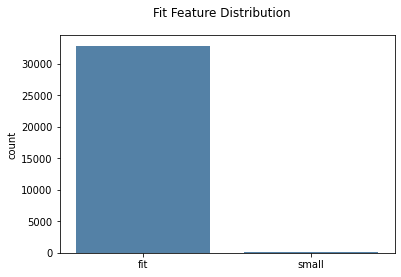

In [21]:
ypred = model3.predict(X_test)

test_accuracy = accuracy_score(y_test, ypred)
test_f1_score = f1_score(y_test, ypred, average='weighted')
test_precision_score = precision_score(y_test, ypred, average='weighted')
test_recall_score = recall_score(y_test, ypred, average='weighted')

print('Test Accuracy:', test_accuracy)
print('Test F1 Score:', test_f1_score)
print('Test Precision Score:', test_precision_score)
print('Test Recall Score:', test_recall_score)
print(ypred)
fig = sns.countplot(ypred, color='steelblue').get_figure()
fig.suptitle("Fit Feature Distribution")
fig.savefig("fit_statistics.png")